# Getting started with Argo data access and management

## Access to data

- Argo DOI, Digital Object Identifier [🔗](http://www.argodatamgt.org/Access-to-data/Argo-DOI-Digital-Object-Identifier)
- Argo GDAC ftp and https servers [🔗](http://www.argodatamgt.org/Access-to-data/Argo-GDAC-ftp-and-https-servers)

## Profile directory format definition: `ar_index_global_prof.txt` \[[1](#references)\]

The profile directory file describes all individual profile files of the GDAC ftp site.

> \# Title: Profile directory file of the Argo Global Data Assembly Center<br/>
> \# Description: The directory file describes all profile files of the argo GDAC ftp site.<br/>
> \# Project: ARGO<br/>
> \# Format version: 2.0<br/>
> \# Date of update: 20031028075500<br/>
> \# FTP root number 1: ftp://ftp.ifremer.fr/ifremer/argo/dac<br/>
> \# FTP root number 2: ftp://usgodae.usgodae.org/pub/outgoing/argo/dac<br/>
> \# GDAC node: CORIOLIS<br/>
> file,date,latitude,longitude,ocean,profiler_type,institution,date_update<br/>
> aoml/13857/profiles/R13857_001.nc,199707292003,0.267,-16.032,A,0845,AO,20030214155117<br/>
> ...

- file: path and file name on the ftp site. The file name contains the float number and the cycle number.
- date: date of the profile, YYYYMMDDHHMISS
- latitude, longitude: location of the profile
- ocean: code of the ocean of the profile as described in reference table 13
- profiler_type: type of profiling float as described in reference table 8
- institution: institution of the profiling float described in reference table 4
- date_update: date of last update of the file, YYYYMMDDHHMISS

In [1]:
# Notebooks imports
import urllib  # Opening and reading URLs
import cartopy # Geospatial data processing
import netCDF4 # Provides an object-oriented interface to the netCDF library
import pandas as pd # Data analysis and manipulation tool
from matplotlib import pyplot as plt # Library for creating static, animated, and interactive visualizations

In [2]:
# Reading the profile directory file from an FTP server
odf = pd.read_csv('ftp://ftp.ifremer.fr/ifremer/argo/ar_index_global_prof.txt', skiprows=8).dropna()
odf

,file,date,latitude,longitude,ocean,profiler_type,institution,date_update
0,aoml/13857/profiles/R13857_001.nc,1.997073e+13,0.267,-16.032,A,845,AO,20181011180520
1,aoml/13857/profiles/R13857_002.nc,1.997081e+13,0.072,-17.659,A,845,AO,20181011180521
2,aoml/13857/profiles/R13857_003.nc,1.997082e+13,0.543,-19.622,A,845,AO,20181011180521
3,aoml/13857/profiles/R13857_004.nc,1.997083e+13,1.256,-20.521,A,845,AO,20181011180521
4,aoml/13857/profiles/R13857_005.nc,1.997091e+13,0.720,-20.768,A,845,AO,20181011180521
...,...,...,...,...,...,...,...,...
2760109,nmdis/2901633/profiles/R2901633_067.nc,2.013050e+13,27.462,139.107,P,841,NM,20130507103443
2760110,nmdis/2901633/profiles/R2901633_068.nc,2.013051e+13,27.432,138.840,P,841,NM,20130511165723
2760111,nmdis/2901633/profiles/R2901633_069.nc,2.013052e+13,27.692,138.677,P,841,NM,20130521170139
2760112,nmdis/2901633/profiles/R2901633_070.nc,2.013053e+13,27.895,138.465,P,841,NM,20130531181516


In [3]:
# Extracting useful variables and formatting the dataframe
split = odf.file.str.split("/", n=4, expand=True)
odf['dac'] = split[0]
odf['profiler'] = split[1]
odf['data_mode'] = split[3].astype(str).str[0]
df = odf[["profiler","dac","data_mode","date","latitude","longitude","file"]]
df

,profiler,dac,data_mode,date,latitude,longitude,file
0,13857,aoml,R,1.997073e+13,0.267,-16.032,aoml/13857/profiles/R13857_001.nc
1,13857,aoml,R,1.997081e+13,0.072,-17.659,aoml/13857/profiles/R13857_002.nc
2,13857,aoml,R,1.997082e+13,0.543,-19.622,aoml/13857/profiles/R13857_003.nc
3,13857,aoml,R,1.997083e+13,1.256,-20.521,aoml/13857/profiles/R13857_004.nc
4,13857,aoml,R,1.997091e+13,0.720,-20.768,aoml/13857/profiles/R13857_005.nc
...,...,...,...,...,...,...,...
2760109,2901633,nmdis,R,2.013050e+13,27.462,139.107,nmdis/2901633/profiles/R2901633_067.nc
2760110,2901633,nmdis,R,2.013051e+13,27.432,138.840,nmdis/2901633/profiles/R2901633_068.nc
2760111,2901633,nmdis,R,2.013052e+13,27.692,138.677,nmdis/2901633/profiles/R2901633_069.nc
2760112,2901633,nmdis,R,2.013053e+13,27.895,138.465,nmdis/2901633/profiles/R2901633_070.nc


In [4]:
# Filtering profiles within a study area
lon_min, lon_max, lat_min, lat_max = -112, -105, 19, 26
df = df[(df.longitude >= lon_min) & (df.longitude <= lon_max) & (df.latitude >= lat_min) & (df.latitude <= lat_max)]
df

,profiler,dac,data_mode,date,latitude,longitude,file
335037,3900665,aoml,D,2.007122e+13,20.176,-109.961,aoml/3900665/profiles/D3900665_001.nc
335038,3900665,aoml,D,2.007123e+13,19.677,-109.741,aoml/3900665/profiles/D3900665_002.nc
335039,3900665,aoml,D,2.008011e+13,19.062,-109.943,aoml/3900665/profiles/D3900665_003.nc
335050,3900665,aoml,D,2.008051e+13,19.295,-110.533,aoml/3900665/profiles/D3900665_014.nc
335051,3900665,aoml,D,2.008052e+13,19.604,-110.345,aoml/3900665/profiles/D3900665_015.nc
...,...,...,...,...,...,...,...
2749213,4902475,meds,D,2.020011e+13,20.985,-111.787,meds/4902475/profiles/D4902475_026.nc
2749214,4902475,meds,D,2.020012e+13,21.126,-111.664,meds/4902475/profiles/D4902475_027.nc
2749215,4902475,meds,D,2.020020e+13,21.322,-111.605,meds/4902475/profiles/D4902475_028.nc
2749216,4902475,meds,D,2.020021e+13,21.500,-111.648,meds/4902475/profiles/D4902475_029.nc


In [5]:
# Filtering profiles by date range
start_date, end_date = 20150101e6, 20201231e6
df = df[(df.date >= start_date) & (df.date <= end_date)]
df

,profiler,dac,data_mode,date,latitude,longitude,file
590130,4901635,aoml,D,2.015010e+13,21.216,-109.759,aoml/4901635/profiles/D4901635_040.nc
590131,4901635,aoml,D,2.015011e+13,20.762,-109.563,aoml/4901635/profiles/D4901635_041.nc
590132,4901635,aoml,D,2.015012e+13,20.746,-109.580,aoml/4901635/profiles/D4901635_042.nc
590133,4901635,aoml,D,2.015013e+13,20.955,-109.606,aoml/4901635/profiles/D4901635_043.nc
590134,4901635,aoml,D,2.015021e+13,21.224,-109.709,aoml/4901635/profiles/D4901635_044.nc
...,...,...,...,...,...,...,...
2749213,4902475,meds,D,2.020011e+13,20.985,-111.787,meds/4902475/profiles/D4902475_026.nc
2749214,4902475,meds,D,2.020012e+13,21.126,-111.664,meds/4902475/profiles/D4902475_027.nc
2749215,4902475,meds,D,2.020020e+13,21.322,-111.605,meds/4902475/profiles/D4902475_028.nc
2749216,4902475,meds,D,2.020021e+13,21.500,-111.648,meds/4902475/profiles/D4902475_029.nc


In [6]:
# Filtering profiles by data mode
df = df[df.data_mode == "D"]
df

,profiler,dac,data_mode,date,latitude,longitude,file
590130,4901635,aoml,D,2.015010e+13,21.216,-109.759,aoml/4901635/profiles/D4901635_040.nc
590131,4901635,aoml,D,2.015011e+13,20.762,-109.563,aoml/4901635/profiles/D4901635_041.nc
590132,4901635,aoml,D,2.015012e+13,20.746,-109.580,aoml/4901635/profiles/D4901635_042.nc
590133,4901635,aoml,D,2.015013e+13,20.955,-109.606,aoml/4901635/profiles/D4901635_043.nc
590134,4901635,aoml,D,2.015021e+13,21.224,-109.709,aoml/4901635/profiles/D4901635_044.nc
...,...,...,...,...,...,...,...
2749213,4902475,meds,D,2.020011e+13,20.985,-111.787,meds/4902475/profiles/D4902475_026.nc
2749214,4902475,meds,D,2.020012e+13,21.126,-111.664,meds/4902475/profiles/D4902475_027.nc
2749215,4902475,meds,D,2.020020e+13,21.322,-111.605,meds/4902475/profiles/D4902475_028.nc
2749216,4902475,meds,D,2.020021e+13,21.500,-111.648,meds/4902475/profiles/D4902475_029.nc


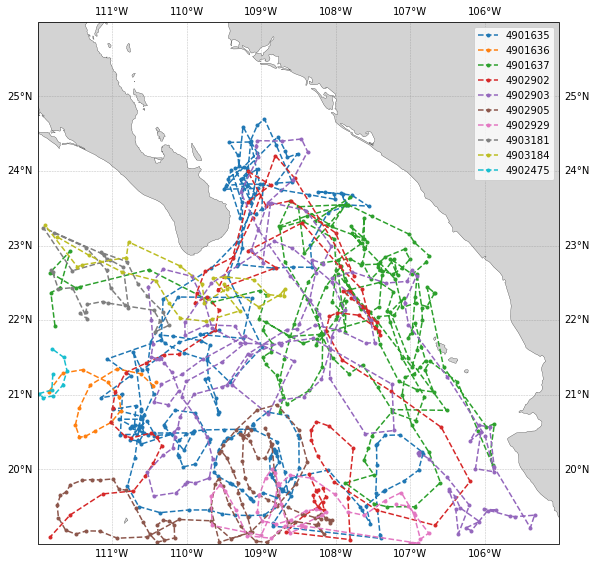

In [7]:
# Getting unique profilers ids
profilers = df.profiler.unique()

# Set up and plotting map with cartopy
fig = plt.figure(figsize=(6.4*3, 4.8*2))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale="10m", edgecolor='k', facecolor=cartopy.feature.COLORS['land'])
ax.add_feature(land, facecolor='lightgray', linewidth=0.25)
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Plotting one profiler trajectory at a time
for k in range(profilers.shape[0]):
    profiler = df[df.profiler == profilers[k]]
    ax.plot(profiler.longitude, profiler.latitude, linestyle="--", marker=".", label=profilers[k])
ax.legend()

In [8]:
# Reading profile NetCDF file
file = df.file.values[0]
file_name = file.split("/")[-1]
urllib.request.urlretrieve(f"ftp://ftp.ifremer.fr/ifremer/argo/dac/{file}", file_name)

nc = netCDF4.Dataset(file_name)
nc.variables.keys() # Showing variables

dict_keys(['DATA_TYPE', 'FORMAT_VERSION', 'HANDBOOK_VERSION', 'REFERENCE_DATE_TIME', 'DATE_CREATION', 'DATE_UPDATE', 'PLATFORM_NUMBER', 'PROJECT_NAME', 'PI_NAME', 'STATION_PARAMETERS', 'CYCLE_NUMBER', 'DIRECTION', 'DATA_CENTRE', 'DC_REFERENCE', 'DATA_STATE_INDICATOR', 'DATA_MODE', 'PLATFORM_TYPE', 'FLOAT_SERIAL_NO', 'FIRMWARE_VERSION', 'WMO_INST_TYPE', 'JULD', 'JULD_QC', 'JULD_LOCATION', 'LATITUDE', 'LONGITUDE', 'POSITION_QC', 'POSITIONING_SYSTEM', 'PROFILE_PRES_QC', 'PROFILE_TEMP_QC', 'PROFILE_PSAL_QC', 'VERTICAL_SAMPLING_SCHEME', 'CONFIG_MISSION_NUMBER', 'PRES', 'PRES_QC', 'PRES_ADJUSTED', 'PRES_ADJUSTED_QC', 'PRES_ADJUSTED_ERROR', 'TEMP', 'TEMP_QC', 'TEMP_ADJUSTED', 'TEMP_ADJUSTED_QC', 'TEMP_ADJUSTED_ERROR', 'PSAL', 'PSAL_QC', 'PSAL_ADJUSTED', 'PSAL_ADJUSTED_QC', 'PSAL_ADJUSTED_ERROR', 'PARAMETER', 'SCIENTIFIC_CALIB_EQUATION', 'SCIENTIFIC_CALIB_COEFFICIENT', 'SCIENTIFIC_CALIB_COMMENT', 'SCIENTIFIC_CALIB_DATE', 'HISTORY_INSTITUTION', 'HISTORY_STEP', 'HISTORY_SOFTWARE', 'HISTORY_SOFTW

What is each of these variables? Look it up in the [Argo user’s manual v3.41](http://dx.doi.org/10.13155/29825).

## Measurements for each profile \[[1](#references)\]

`<PARAM>` contains the raw values transmitted by the float.

The values in `<PARAM>` should never be altered. `<PARAM>_QC` contains QC flags that pertain to the values in `<PARAM>`. Values in `<PARAM>_QC` are set initially in 'R' and 'A' modes by the automatic real-time tests.

They are later modified in 'D' mode at levels where the QC flags are set incorrectly by the real-time procedures, and where erroneous data are not detected by the real-time procedures.

Each parameter can be adjusted (in delayed-mode, but also in real-time if appropriate). In that case, `<PARAM>_ADJUSTED` contains the adjusted values, `<PARAM>_ADJUSTED_QC` contains the QC flags set by the adjustment process, and `<PARAM>_ADJUSTED_ERROR` contains the adjustment uncertainties.

In [9]:
# Extracting profile data
DATA_MODE = nc.variables["DATA_MODE"][:].data[0]

TEMP = nc.variables["TEMP"][:].data[0]
TEMP_QC = nc.variables["TEMP_QC"][:].data[0]
TEMP_ADJUSTED = nc.variables["TEMP_ADJUSTED"][:].data[0]
TEMP_ADJUSTED_QC = nc.variables["TEMP_ADJUSTED_QC"][:].data[0]
TEMP_ADJUSTED_ERROR = nc.variables["TEMP_ADJUSTED_ERROR"][:].data[0]

TEMP_QC = [QC.decode('UTF-8') for QC in TEMP_QC]
TEMP_ADJUSTED_QC = [QC.decode('UTF-8') for QC in TEMP_ADJUSTED_QC]

DATA_MODE.decode('UTF-8')

'D'

Indicates if the profile contains real time, delayed mode or adjusted data.
- R: real time data
- D: delayed mode data
- A: real time data with adjusted values

In [10]:
temp = pd.DataFrame({"TEMP": TEMP, "TEMP_QC": TEMP_QC, "TEMP_ADJUSTED": TEMP_ADJUSTED, "TEMP_ADJUSTED_QC": TEMP_ADJUSTED_QC, "TEMP_ADJUSTED_ERROR": TEMP_ADJUSTED_ERROR})
temp

,TEMP,TEMP_QC,TEMP_ADJUSTED,TEMP_ADJUSTED_QC,TEMP_ADJUSTED_ERROR
0,24.882000,1,24.882000,1,0.002236
1,24.879999,1,24.879999,1,0.002236
2,24.878000,1,24.878000,1,0.002236
3,24.875999,1,24.875999,1,0.002236
4,24.878000,1,24.878000,1,0.002236
...,...,...,...,...,...
992,2.266000,1,2.266000,1,0.002236
993,2.265000,1,2.265000,1,0.002236
994,2.264000,1,2.264000,1,0.002236
995,2.261000,1,2.261000,1,0.002236


## Argo quality control flag scale \[[1](#references)\]

| QC | Meaning                                           | Real-time comment (applicable to `<PARAM>_QC` in 'R' mode and `<PARAM>_ADJUSTED_QC` in 'A' mode)                                                                                                                                              | Delayed-mode comment (applicable to `<PARAM>_ADJUSTED_QC` in 'D' mode)                                                                                   |
|:---|:--------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------|
| 0  | No QC is performed                                | No QC is performed.                                                                                                                                                                                                                       | No QC is performed.                                                                                                                                    |
| 1  | Good data                                         | Good data. All Argo real-time QC tests passed. These measurements are good within the limits of the Argo real-time QC tests.                                                                                                              | Good data. No adjustment is needed, or the adjusted value is statistically consistent with good quality reference data. An error estimate is supplied. |
| 2  | Probably good data                                | Probably good data. These measurements are to be used with caution.                                                                                                                                                                       | Probably good data. Delayed-mode evaluation is based on insufficient information. An error estimate is supplied.                                       |
| 3  | Probably bad data that are potentially adjustable | Probably bad data. These measurements are not to be used without scientific adjustment, e.g. data affected by sensor drift but may be adjusted in delayed-mode.                                                                           | Probably bad data. An adjustment may (or may not) have been applied, but the value may still be bad. An error estimate is supplied.                    |
| 4  | Bad data                                          | Bad data. These measurements are not to be used. A flag '4' indicates that a relevant real-time qc test has failed. A flag '4' may also be assigned for bad measurements that are known to be not adjustable, e.g. due to sensor failure. | Bad data. Not adjustable. Adjusted data are replaced by FillValue.                                                                                     |
| 5  | Value changed                                     | Value changed                                                                                                                                                                                                                             | Value changed                                                                                                                                          |
| 6  | Not used                                          | Not used                                                                                                                                                                                                                                  | Not used                                                                                                                                               |
| 7  | Not used                                          | Not used                                                                                                                                                                                                                                  | Not used                                                                                                                                               |
| 8  | Estimated value                                   | Estimated value (interpolated, extrapolated or other estimation).                                                                                                                                                                         | Estimated value (interpolated, extrapolated or other estimation).                                                                                      |
| 9  | Missing value                                     | Missing value. Data parameter will record FillValue.                                                                                                                                                                                      | Missing value. Data parameter will record FillValue.                                                                                                   |
| ‘‘ | FillValue                                         | Empty space in NetCDF file.                                                                                                                                                                                                               | Empty space in NetCDF file.                                                                                                                            |

## References
<a id="references"></a>

\[1\] Argo Data Management Team (2022). Argo user’s manual. [https://doi.org/10.13155/29825](https://doi.org/10.13155/29825)

[https://github.com/romeroqe/snippets](https://github.com/romeroqe/snippets)